## Car  Assignment

- Build a linear model to infer how the price of car varies with independent variables
- steps involved in model
   - 1.Data Exploration
   - 2.Data visualization
   - 3.Data preprocessing
   - 4.Feature selection
   - 5.Model building
   - 6.Residual analysis
   - 7.Model Evaluation



In [2]:
## Data Exploration

#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

#loading the data
cars=pd.read_csv('CarPrice_Assignment.csv')

cars_df=cars.copy()

#preview the data
cars_df.head()

#exploring thr data
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

- The given data has no missing values

In [3]:
cars_df.describe()

cars_df['CarName']

#function to get only carname from CarName columns(having carname model)
def get_carName(car):
    return car.split()[0]

cars_df['carname']=cars_df['CarName'].apply(get_carName)

#function which corrects the miss spelled car names
def correct_carnames(x):
    if x=='toyouta':
        return 'toyota'
    elif x=='Nissan':
        return 'nissan'
    elif (x=='vw') | (x=='vokswagen'):
        return 'volkswagen'
    elif x=='porcshce':
        return 'porsche'
    elif x=='maxda':
        return 'mazda'
    else:
        return x

cars_df['carname']=cars_df['carname'].apply(correct_carnames)

cars_df['carname']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181         toyota
182     volkswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189     volkswagen
190     volkswagen
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

## Data Visualization
- visualizing the categorical variables using box and count plots

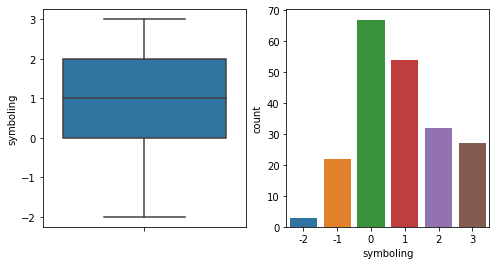

In [5]:
#Univariant analysis and segmented analysis

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4))
sns.boxplot(cars_df['symboling'],orient='v',ax=ax1)
sns.countplot(cars_df['symboling'],ax=ax2)
#avearge symboling of all caars is around 1

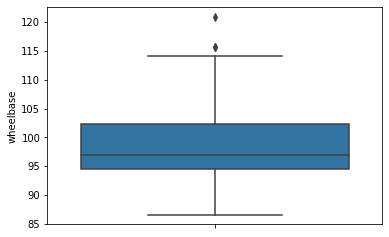

In [6]:
sns.boxplot(cars_df['wheelbase'],orient='v')
#average wheelbase of all cars is around 96

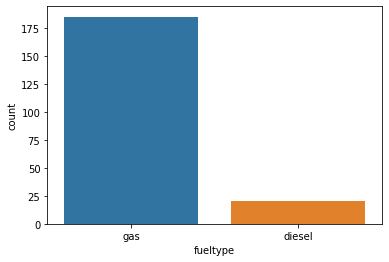

In [7]:
sns.countplot(cars_df['fueltype'])
# most of the cars are gas based compared to diesel

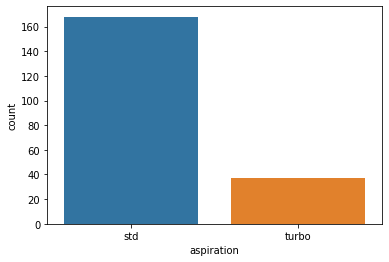

In [8]:
sns.countplot(cars_df['aspiration'])
#most of the cars has std as aspiration

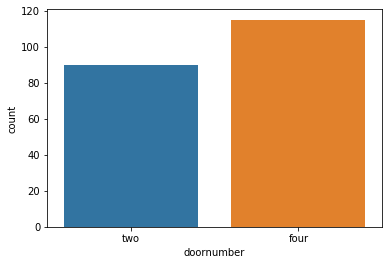

In [9]:
sns.countplot(cars_df['doornumber'])
# most number of cars has 4 doors

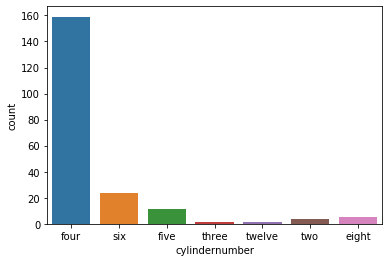

In [10]:
sns.countplot(cars_df['cylindernumber'])

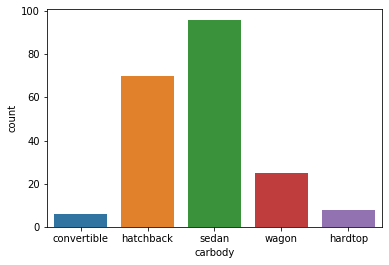

In [11]:
sns.countplot(cars_df['carbody'])

#most of the cars has sedan carbody and least cars have convertible carbody types

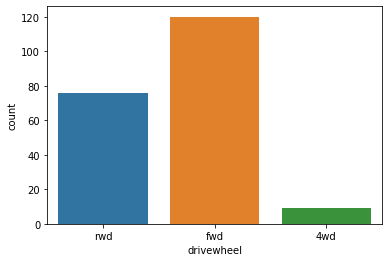

In [12]:
sns.countplot(cars_df['drivewheel'])

#most cars have fwd drivewheel

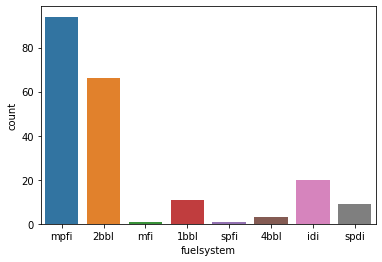

In [13]:
sns.countplot(cars_df['fuelsystem'])

#most cars have mpfi fuelsystem

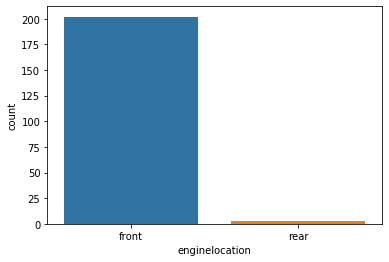

In [14]:
sns.countplot(cars_df['enginelocation'])

#most cars engine is located at front

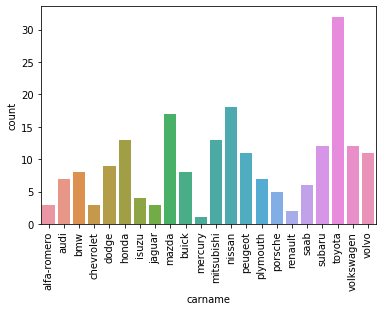

In [15]:
fig=sns.countplot(cars_df['carname'])
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show()

#in given data set we have more toyato company cars

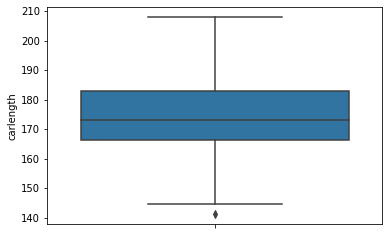

In [16]:
sns.boxplot(cars_df['carlength'],orient='v')

#average carlength of given cars is around 175

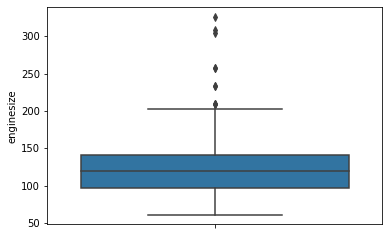

In [17]:
sns.boxplot(cars_df['enginesize'],orient='v')

#average enginesize of given cars is around 125

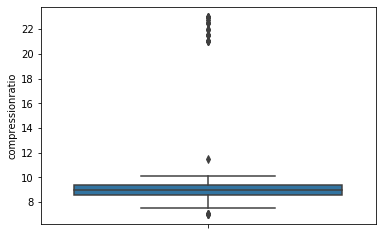

In [18]:
sns.boxplot(cars_df['compressionratio'],orient='v')

#average carlength of given cars is around 9 but there are cars with more than 22 compression ratio

In [20]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [21]:
cars_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carname'],
      dtype='object')

## Bivariate analysis
- to find the correlation between the target and predictor variables

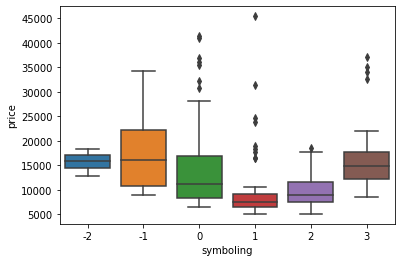

In [22]:
sns.boxplot('symboling','price',data=cars_df)

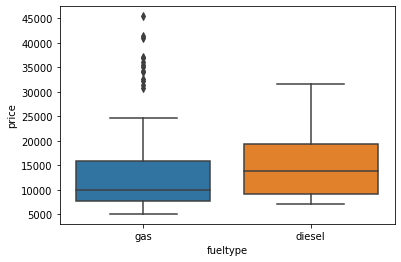

In [23]:
sns.boxplot('fueltype','price',data=cars_df)

#diesel fueltype is having high price than gas fueltype

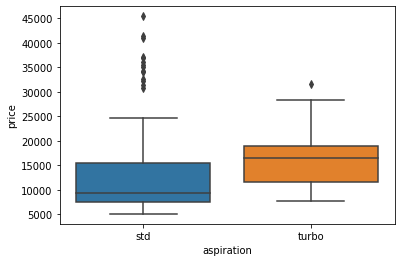

In [24]:
sns.boxplot('aspiration','price',data=cars_df)

#turbo aspiration has high price than std aspiration

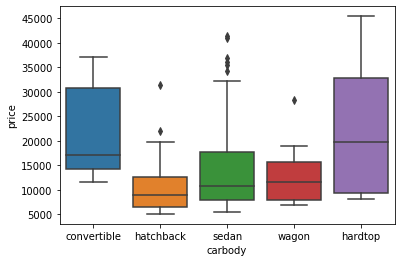

In [25]:
sns.boxplot('carbody','price',data=cars_df)

#convertible carbody types has high price

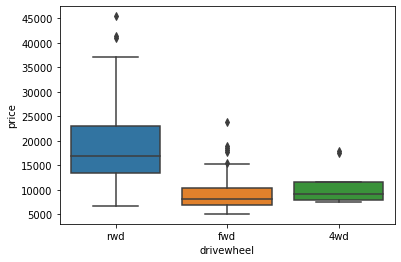

In [26]:
sns.boxplot('drivewheel','price',data=cars_df)

#rwd drivewheel has high price

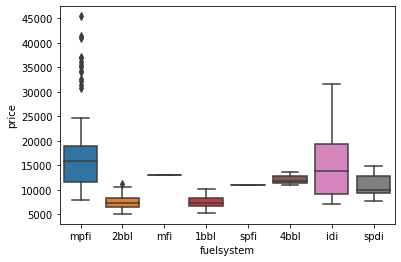

In [27]:
sns.boxplot('fuelsystem','price',data=cars_df)

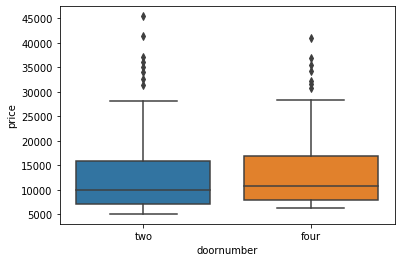

In [28]:
sns.boxplot('doornumber','price',data=cars_df)

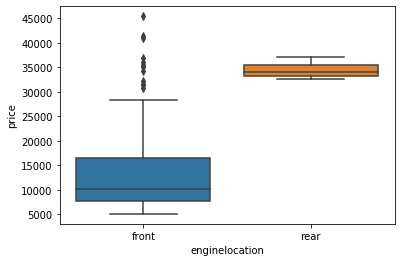

In [29]:
sns.boxplot('enginelocation','price',data=cars_df)

#rear located engine type car has high value

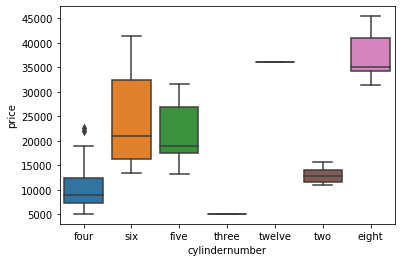

In [30]:
sns.boxplot('cylindernumber','price',data=cars_df)

#eight cylindered car has high price

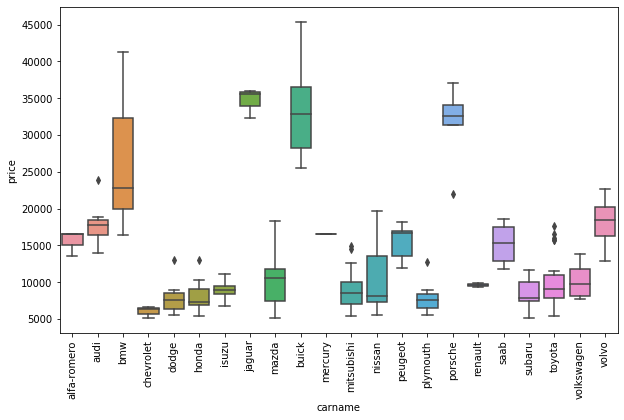

In [31]:
plt.figure(figsize=(10,6))
fig=sns.boxplot('carname','price',data=cars_df)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show()

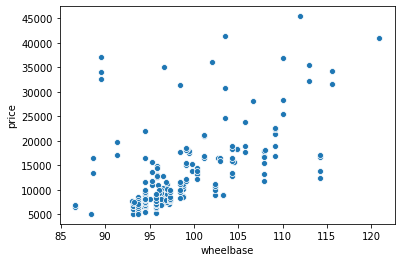

In [32]:
sns.scatterplot('wheelbase','price',data=cars_df)

#Wheelbase is positively correlated with price

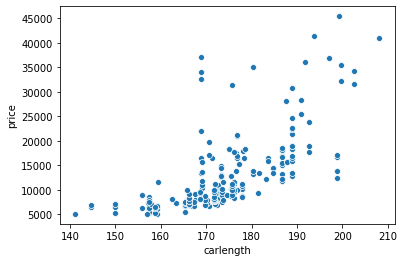

In [33]:
sns.scatterplot('carlength','price',data=cars_df)

#carlength is positively correlated with price

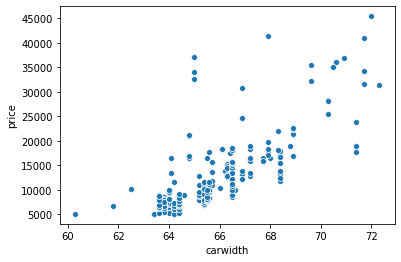

In [34]:
sns.scatterplot('carwidth','price',data=cars_df)

#carwidth is positively correlated with price

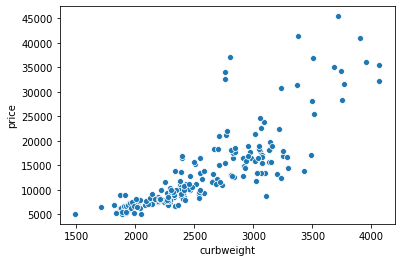

In [35]:
sns.scatterplot('curbweight','price',data=cars_df)

#curbweight is positively correlated with price

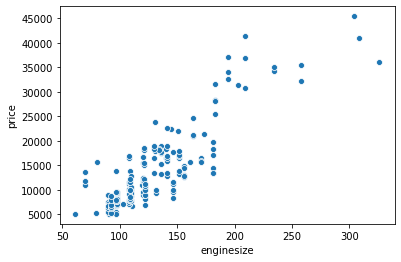

In [36]:
sns.scatterplot('enginesize','price',data=cars_df)

#enginesize is positively correlated with price

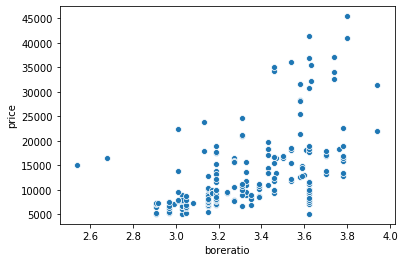

In [37]:
sns.scatterplot('boreratio','price',data=cars_df)

#boreratio is positively correlated with price

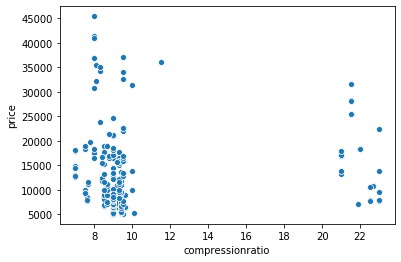

In [38]:
sns.scatterplot('compressionratio','price',data=cars_df)

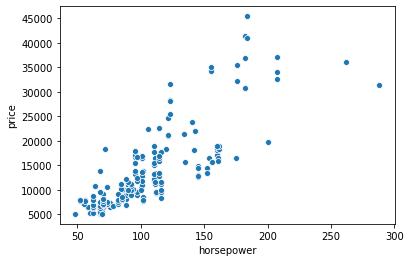

In [39]:
sns.scatterplot('horsepower','price',data=cars_df)

#horsepower is positively correlated with price

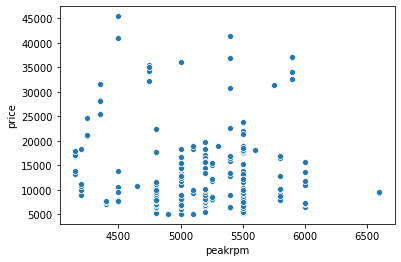

In [40]:
sns.scatterplot('peakrpm','price',data=cars_df)


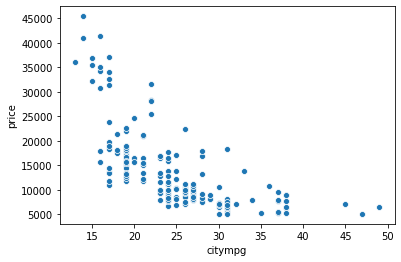

In [41]:
sns.scatterplot('citympg','price',data=cars_df)

#citympg is negatively correlated with price

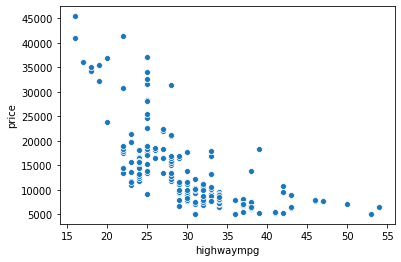

In [42]:
sns.scatterplot('highwaympg','price',data=cars_df)

#highwaympg is negatively correlated with price


In [43]:
cars_df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carname
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Encoding

- Encoding categorical variables to numerical variables

In [44]:


cars_df['fueltype'].value_counts()

#Converting fueltype using binary encoding
cars_df['fueltype']=cars_df['fueltype'].map({'gas':1,'diesel':0})

cars_df['doornumber'].value_counts()

from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()

#converting string value to integer value using map so that label encoder encoding the ordinal number based on value
cars_df['doornumber']=cars_df['doornumber'].map({'four':4,'two':2})

#converting doornumber using label encoder as doornumber is a ordinal categorical variable
cars_df['doornumber']=label.fit_transform(cars_df['doornumber'])

cars_df['carbody'].value_counts()

# using one hot encoding to transform categorical carbody variable to numerical
cars_df[['convertible','hatchback','sedan','wagon']]=pd.get_dummies(cars_df['carbody']).drop('hardtop',axis=1)

cars_df.drop('carbody',axis=1,inplace=True)

cars_df.head()

cars_df['aspiration'].value_counts()

#converting aspiration using binary encoding
cars_df['aspiration']=cars_df['aspiration'].map({'std':1,'turbo':0})

cars_df.head()

cars_df['drivewheel'].value_counts()

cars_df['drivewheel'].value_counts().index

#converting drivewheel categorical to numerical using one hot encoding
cars_df[['fwd', 'rwd']]=pd.get_dummies(cars_df['drivewheel']).drop('4wd',axis=1)

cars_df.drop('drivewheel',axis=1,inplace=True)

cars_df.head()

cars_df['enginelocation'].value_counts()

#converting enginelocation categorical to numerical using binary encoding
cars_df['enginelocation']=cars_df['enginelocation'].map({'front':1,'rear':0})

cars_df.head()

cars_df['enginetype'].value_counts()

#converting categotical enginetype to numerical using one hot encoding
cars_df[['ohc','ohcf','ohcv','dohc','l','rotor']]=pd.get_dummies(cars_df['enginetype']).drop('dohcv',axis=1)

cars_df.drop('enginetype',axis=1,inplace=True)

cars_df.head()

cars_df['cylindernumber'].value_counts()

#converting cylindernumber using custom map as its value is of integer type
cars_df['cylindernumber']=cars_df['cylindernumber'].map({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12})

cars_df['cylindernumber']=label.fit_transform(cars_df['cylindernumber'])

cars_df.head()

cars_df['fuelsystem'].value_counts()

#converting categotical fuelsystem to numerical using one hot encoding
cars_df[['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi']]=pd.get_dummies(cars_df['fuelsystem']).drop('spfi',axis=1)

cars_df.drop('fuelsystem',axis=1,inplace=True)

cars_df.head()

cars_df['symboling'].value_counts()

cars_df['symboling']=label.fit_transform(cars_df['symboling'])

cars_df['carname'].value_counts()

#coping data to a different dataframe without converting carname to numerical for farther analysis
cars_df_withoutdummies_car=cars_df.copy()

#removing the carname in copied dataframe
cars_df_withoutdummies_car.drop('CarName',axis=1,inplace=True)

cars_df['carname'].value_counts()

# converting the categorical carname to numerical using one hot encoding
cars_df[['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda','isuzu', 'jaguar',
         'mazda', 'mitsubishi', 'nissan','peugeot', 'plymouth', 'porsche',
         'renault', 'saab', 'subaru', 'toyota','volkswagen', 'volvo']]=pd.get_dummies(cars_df['carname']).drop('mercury',axis=1)

cars_df.drop('CarName',axis=1,inplace=True)

cars_df.head()

#number of columns in cars dataframe 
len(cars_df.columns)

#number of columns in dataframe without carname categorical variable
len(cars_df_withoutdummies_car.columns)

41

## Data Preprocessing
- Before feeding data to the model preprocessing data by scaling to reduce the iteration to converge

In [45]:
#performing splitting before scaling 
from sklearn.model_selection import train_test_split

#train and test data with carname added
train_df,test_df=train_test_split(cars_df,test_size=0.3,random_state=1)

#train and test data without carname
train_withoutcar_df,test_withoutcar_df=train_test_split(cars_df_withoutdummies_car,test_size=0.3,random_state=1)

#previewing the train data
train_df.head()

#previewing the train data without carname 
train_withoutcar_df.head()

#importing the minmaxscaler to scale the data
#as minmax scaler removes the outlier not need to treat them separately
from sklearn.preprocessing import MinMaxScaler

#creating a scaler obbject to scale the data
scaler=MinMaxScaler()

train_df.columns

#removing car_ID,carname,price from predictor varaibles

numvars=['symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'convertible', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor', '1bbl', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'alfa-romero', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']

train_withoutcar_df.columns

#predictor variable of dataframe without carname encoded
#car_ID,carname,price are not included

numvar_withoutcar=[ 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'convertible', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor', '1bbl', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi']

#fitting and tranforming the trained data using minmax scaler object
train_df[numvars]=scaler.fit_transform(train_df[numvars])

#test data should be fitted to scaler object so just transforming the test data using scaler object of trained data
test_df[numvars]=scaler.transform(test_df[numvars])

#same procedure is followed for train and test data without carname
scaler_withoutcar=MinMaxScaler()

train_withoutcar_df[numvar_withoutcar]=scaler_withoutcar.fit_transform(train_withoutcar_df[numvar_withoutcar])

test_withoutcar_df[numvar_withoutcar]=scaler_withoutcar.transform(test_withoutcar_df[numvar_withoutcar])

#previewing the training data after scaling
train_df.head()

#preview the training data without car name after scaling
train_withoutcar_df.head()

#segregating predictor and target variables of training data
X_train_scaled=train_df[numvars]
y_train=train_df['price']

#predictor variables
X_train_scaled.columns

#segregating predictor and target variables of training data without carname
X_train_withoutcar_scaled=train_withoutcar_df[numvar_withoutcar]
y_train_withoutcar=train_withoutcar_df['price']

#predictor variables
X_train_withoutcar_scaled.columns

#segregating predictor and target variables of test data
X_test_scaled=test_df[numvars]
y_test=test_df['price']

#segregating predictor and target variables of test data without carname
X_test_withoutcar_scaled=test_withoutcar_df[numvar_withoutcar]
y_test_withoutcar=test_withoutcar_df['price']


## Model building

In [61]:
X_train_scaled.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
124,1.0,1.0,0.0,0.0,1.0,0.320690,0.493103,0.428571,0.200000,0.469613,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181,0.2,1.0,1.0,1.0,1.0,0.617241,0.744828,0.447619,0.525000,0.611135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
154,0.4,1.0,1.0,1.0,1.0,0.313793,0.432759,0.171429,0.941667,0.245219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53,0.6,1.0,1.0,1.0,1.0,0.224138,0.382759,0.228571,0.525000,0.098598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.6,1.0,1.0,0.0,1.0,0.272414,0.356897,0.190476,0.558333,0.101147,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
y_train.head()

124    12764.0
181    15750.0
154     7898.0
53      6695.0
94      7299.0
Name: price, dtype: float64

In [49]:
X_test_scaled.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
78,0.8,1.0,1.0,0.0,1.0,0.244828,0.218966,0.247619,0.250000,0.123672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.6,1.0,1.0,1.0,1.0,0.272414,0.441379,0.190476,0.475000,0.137697,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,0.6,1.0,1.0,0.0,1.0,0.313793,0.243103,0.171429,0.558333,0.138972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44,0.6,1.0,1.0,0.0,1.0,0.272414,0.194828,0.171429,0.350000,0.068423,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.4,1.0,1.0,1.0,1.0,0.341379,0.531034,0.066667,0.525000,0.280068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
y_test.head()

78      6669.0
97      7999.0
151     6338.0
44      8916.5
40     10295.0
Name: price, dtype: float64

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [51]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [57]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn import metrics 

## Ridge Regression

In [54]:
ridge_model=Ridge()
folds=KFold(n_splits=5,shuffle=True,random_state=100)

In [55]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [58]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [59]:
model_cv=GridSearchCV(estimator=ridge_model,
             param_grid=params,
             verbose=1,
             cv=folds,
             scoring='neg_mean_absolute_error',
             return_train_score=True)

In [64]:
model_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [67]:
cv_results=pd.DataFrame(model_cv.cv_results_)

In [68]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004794,0.007746,0.000799,0.001598,0.0001,{'alpha': 0.0001},-1716.324926,-1309.278193,-1513.084808,-3283.344260,...,-1971.752135,695.905472,16,-933.700234,-1070.537107,-947.775622,-795.322903,-793.775934,-908.222360,104.311008
1,0.001599,0.001959,0.001598,0.001957,0.001,{'alpha': 0.001},-1712.462510,-1294.778312,-1509.198067,-3086.577179,...,-1928.075463,627.548326,15,-931.953135,-1069.728715,-947.167421,-794.989485,-793.629373,-907.493626,104.033410
2,0.001598,0.001957,0.002397,0.001957,0.01,{'alpha': 0.01},-1675.215703,-1219.809146,-1502.705819,-2498.799322,...,-1801.770695,456.852777,13,-927.475667,-1063.725574,-951.752836,-838.108558,-797.161219,-915.644771,93.190024
3,0.001598,0.001957,0.000799,0.001598,0.05,{'alpha': 0.05},-1598.287685,-1262.308253,-1555.971337,-2389.016604,...,-1795.453402,423.316836,12,-947.810673,-1072.122649,-1003.127228,-907.697897,-819.887049,-950.129099,85.393210
4,0.001598,0.001957,0.000000,0.000000,0.1,{'alpha': 0.1},-1563.387199,-1319.488208,-1575.828963,-2227.535700,...,-1777.775523,374.866609,11,-984.055564,-1090.998351,-1041.309897,-945.224541,-846.880581,-981.693787,83.680048


In [86]:
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004794,0.007746,0.000799,0.001598,0.0001,{'alpha': 0.0001},-1716.324926,-1309.278193,-1513.084808,-3283.344260,...,-1971.752135,695.905472,16,-933.700234,-1070.537107,-947.775622,-795.322903,-793.775934,-908.222360,104.311008
1,0.001599,0.001959,0.001598,0.001957,0.0010,{'alpha': 0.001},-1712.462510,-1294.778312,-1509.198067,-3086.577179,...,-1928.075463,627.548326,15,-931.953135,-1069.728715,-947.167421,-794.989485,-793.629373,-907.493626,104.033410
2,0.001598,0.001957,0.002397,0.001957,0.0100,{'alpha': 0.01},-1675.215703,-1219.809146,-1502.705819,-2498.799322,...,-1801.770695,456.852777,13,-927.475667,-1063.725574,-951.752836,-838.108558,-797.161219,-915.644771,93.190024
3,0.001598,0.001957,0.000799,0.001598,0.0500,{'alpha': 0.05},-1598.287685,-1262.308253,-1555.971337,-2389.016604,...,-1795.453402,423.316836,12,-947.810673,-1072.122649,-1003.127228,-907.697897,-819.887049,-950.129099,85.393210
4,0.001598,0.001957,0.000000,0.000000,0.1000,{'alpha': 0.1},-1563.387199,-1319.488208,-1575.828963,-2227.535700,...,-1777.775523,374.866609,11,-984.055564,-1090.998351,-1041.309897,-945.224541,-846.880581,-981.693787,83.680048


In [90]:
cv_results[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].head(25)

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-908.222360,-1971.752135,16
1,0.0010,-907.493626,-1928.075463,15
2,0.0100,-915.644771,-1801.770695,13
3,0.0500,-950.129099,-1795.453402,12
4,0.1000,-981.693787,-1777.775523,11
5,0.2000,-1023.950814,-1743.009626,9
6,0.3000,-1056.952632,-1721.460881,8
7,0.4000,-1084.419464,-1706.305568,7
8,0.5000,-1107.476244,-1694.008609,6
9,0.6000,-1127.561665,-1687.782543,5


In [72]:
cv_results['param_alpha']=cv_results['param_alpha'].astype('float')

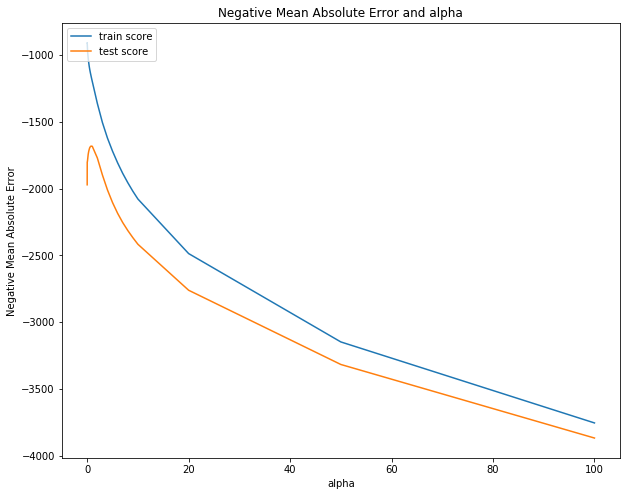

In [89]:
plt.figure(figsize=(10,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
#plt.vlines(x=1,ymin=-4000,ymax=0)
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [104]:
alpha = 0.8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scaled,y_train)
ridge.coef_

array([ 6.92187843e+02, -6.61947153e+02, -8.46464423e+02,  8.72111671e+02,
       -5.26654895e+03,  3.35740118e+03,  8.90981246e+02,  5.28614115e+03,
        5.45424640e+02,  4.67746410e+03,  4.43418271e+03,  6.70067843e+03,
       -9.25175364e+02, -9.18871701e+02, -5.52360466e+02,  4.45744854e+03,
        8.68068113e+02, -4.84006718e+02, -6.36247187e+02,  2.30076497e+03,
       -1.51350528e+03, -1.37601585e+03, -2.34501323e+03, -7.89994259e+02,
        1.02701182e+03, -2.45354302e+02, -1.85883065e+03, -3.37233679e+02,
        1.65792280e+03,  3.48433881e+02,  8.98682199e+02, -5.91593606e+02,
       -3.32385928e+00,  8.98682199e+02,  6.61947153e+02,  0.00000000e+00,
       -1.08352285e+01, -1.87250448e+02, -7.05832238e+02,  8.96737045e+02,
        5.34502280e+03,  6.14834304e+03, -6.45638441e+02, -9.86552269e+02,
        2.12729419e+02, -1.08773037e+03,  4.60251937e+03, -4.70025401e+02,
       -1.85945921e+03, -1.83281943e+03, -1.85883065e+03, -1.66845965e+03,
        5.43385687e+03, -

## Lasso Regression

In [92]:
lasso_model=Lasso()
folds=KFold(n_splits=5,shuffle=True,random_state=100)

In [93]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [94]:
model_cv=GridSearchCV(estimator=lasso_model,
             param_grid=params,
             verbose=1,
             cv=folds,
             scoring='neg_mean_absolute_error',
             return_train_score=True)

In [96]:
model_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [99]:
ls_results = pd.DataFrame(model_cv.cv_results_)
ls_results = cv_results[cv_results['param_alpha']<=200]
ls_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004794,0.007746,0.000799,0.001598,0.0001,{'alpha': 0.0001},-1716.324926,-1309.278193,-1513.084808,-3283.344260,...,-1971.752135,695.905472,16,-933.700234,-1070.537107,-947.775622,-795.322903,-793.775934,-908.222360,104.311008
1,0.001599,0.001959,0.001598,0.001957,0.0010,{'alpha': 0.001},-1712.462510,-1294.778312,-1509.198067,-3086.577179,...,-1928.075463,627.548326,15,-931.953135,-1069.728715,-947.167421,-794.989485,-793.629373,-907.493626,104.033410
2,0.001598,0.001957,0.002397,0.001957,0.0100,{'alpha': 0.01},-1675.215703,-1219.809146,-1502.705819,-2498.799322,...,-1801.770695,456.852777,13,-927.475667,-1063.725574,-951.752836,-838.108558,-797.161219,-915.644771,93.190024
3,0.001598,0.001957,0.000799,0.001598,0.0500,{'alpha': 0.05},-1598.287685,-1262.308253,-1555.971337,-2389.016604,...,-1795.453402,423.316836,12,-947.810673,-1072.122649,-1003.127228,-907.697897,-819.887049,-950.129099,85.393210
4,0.001598,0.001957,0.000000,0.000000,0.1000,{'alpha': 0.1},-1563.387199,-1319.488208,-1575.828963,-2227.535700,...,-1777.775523,374.866609,11,-984.055564,-1090.998351,-1041.309897,-945.224541,-846.880581,-981.693787,83.680048


In [106]:
ls_results[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].head(25)

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-908.222360,-1971.752135,16
1,0.0010,-907.493626,-1928.075463,15
2,0.0100,-915.644771,-1801.770695,13
3,0.0500,-950.129099,-1795.453402,12
4,0.1000,-981.693787,-1777.775523,11
5,0.2000,-1023.950814,-1743.009626,9
6,0.3000,-1056.952632,-1721.460881,8
7,0.4000,-1084.419464,-1706.305568,7
8,0.5000,-1107.476244,-1694.008609,6
9,0.6000,-1127.561665,-1687.782543,5


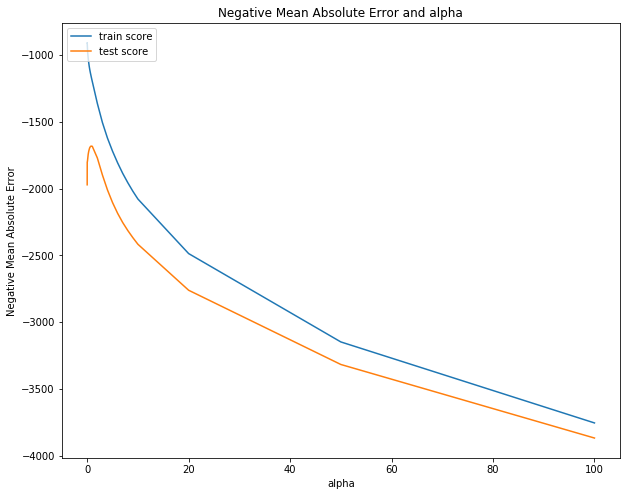

In [107]:
ls_results['param_alpha']=ls_results['param_alpha'].astype('float')
plt.figure(figsize=(10,8))
plt.plot(ls_results['param_alpha'],ls_results['mean_train_score'])
plt.plot(ls_results['param_alpha'],ls_results['mean_test_score'])
#plt.vlines(x=1,ymin=-4000,ymax=0)
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [112]:
alpha = 15
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_scaled,y_train)
lasso.coef_

array([ 0.0000e+00, -0.0000e+00, -8.3400e+02,  5.7800e+02, -9.5420e+03,
        2.0540e+03,  0.0000e+00,  7.9450e+03,  0.0000e+00,  4.1070e+03,
        0.0000e+00,  1.3437e+04, -2.1970e+03, -3.0000e+02,  0.0000e+00,
        3.9990e+03,  6.1000e+02, -0.0000e+00, -0.0000e+00,  2.9380e+03,
       -3.1900e+02,  0.0000e+00, -7.0600e+02, -1.0970e+03,  3.1400e+02,
        1.2600e+02, -1.2890e+03, -2.6900e+02,  0.0000e+00,  0.0000e+00,
        1.4040e+03, -0.0000e+00, -9.0000e+01,  1.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00, -0.0000e+00,  0.0000e+00,  1.3750e+03,
        7.3510e+03,  7.7810e+03, -0.0000e+00, -0.0000e+00,  0.0000e+00,
       -0.0000e+00,  4.5780e+03,  3.7000e+02, -1.3200e+03, -7.2000e+02,
       -4.8000e+02, -7.4000e+02,  6.0700e+03, -0.0000e+00,  1.3010e+03,
       -7.8600e+02, -1.3010e+03, -1.0000e+02,  0.0000e+00])